/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


====================[Data Types]====================
BUY_TYPE                 object
CHILD_NUM                 int64
BUY_MONTH                 int64
BUDGET                  float64
AGE_a                     uint8
AGE_b                     uint8
AGE_c                     uint8
AGE_d                     uint8
AGE_e                     uint8
AGE_f                     uint8
AGE_g                     uint8
AGE_h                     uint8
AGE_i                     uint8
AGE_j                     uint8
AGE_k                     uint8
AGE_l                     uint8
AGE_m                     uint8
AGE_n                     uint8
AGE_o                     uint8
AGE_p                     uint8
AGE_q                     uint8
SEX_a                     uint8
SEX_b                     uint8
OCCUPATION_NANA           uint8
OCCUPATION_a37            uint8
OCCUPATION_a41            uint8
OCCUPATION_b28            uint8
OCCUPATION_c32            uint8
OCCUPATION_c37            uint8
OCCUPATION_c41     

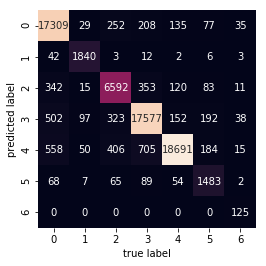

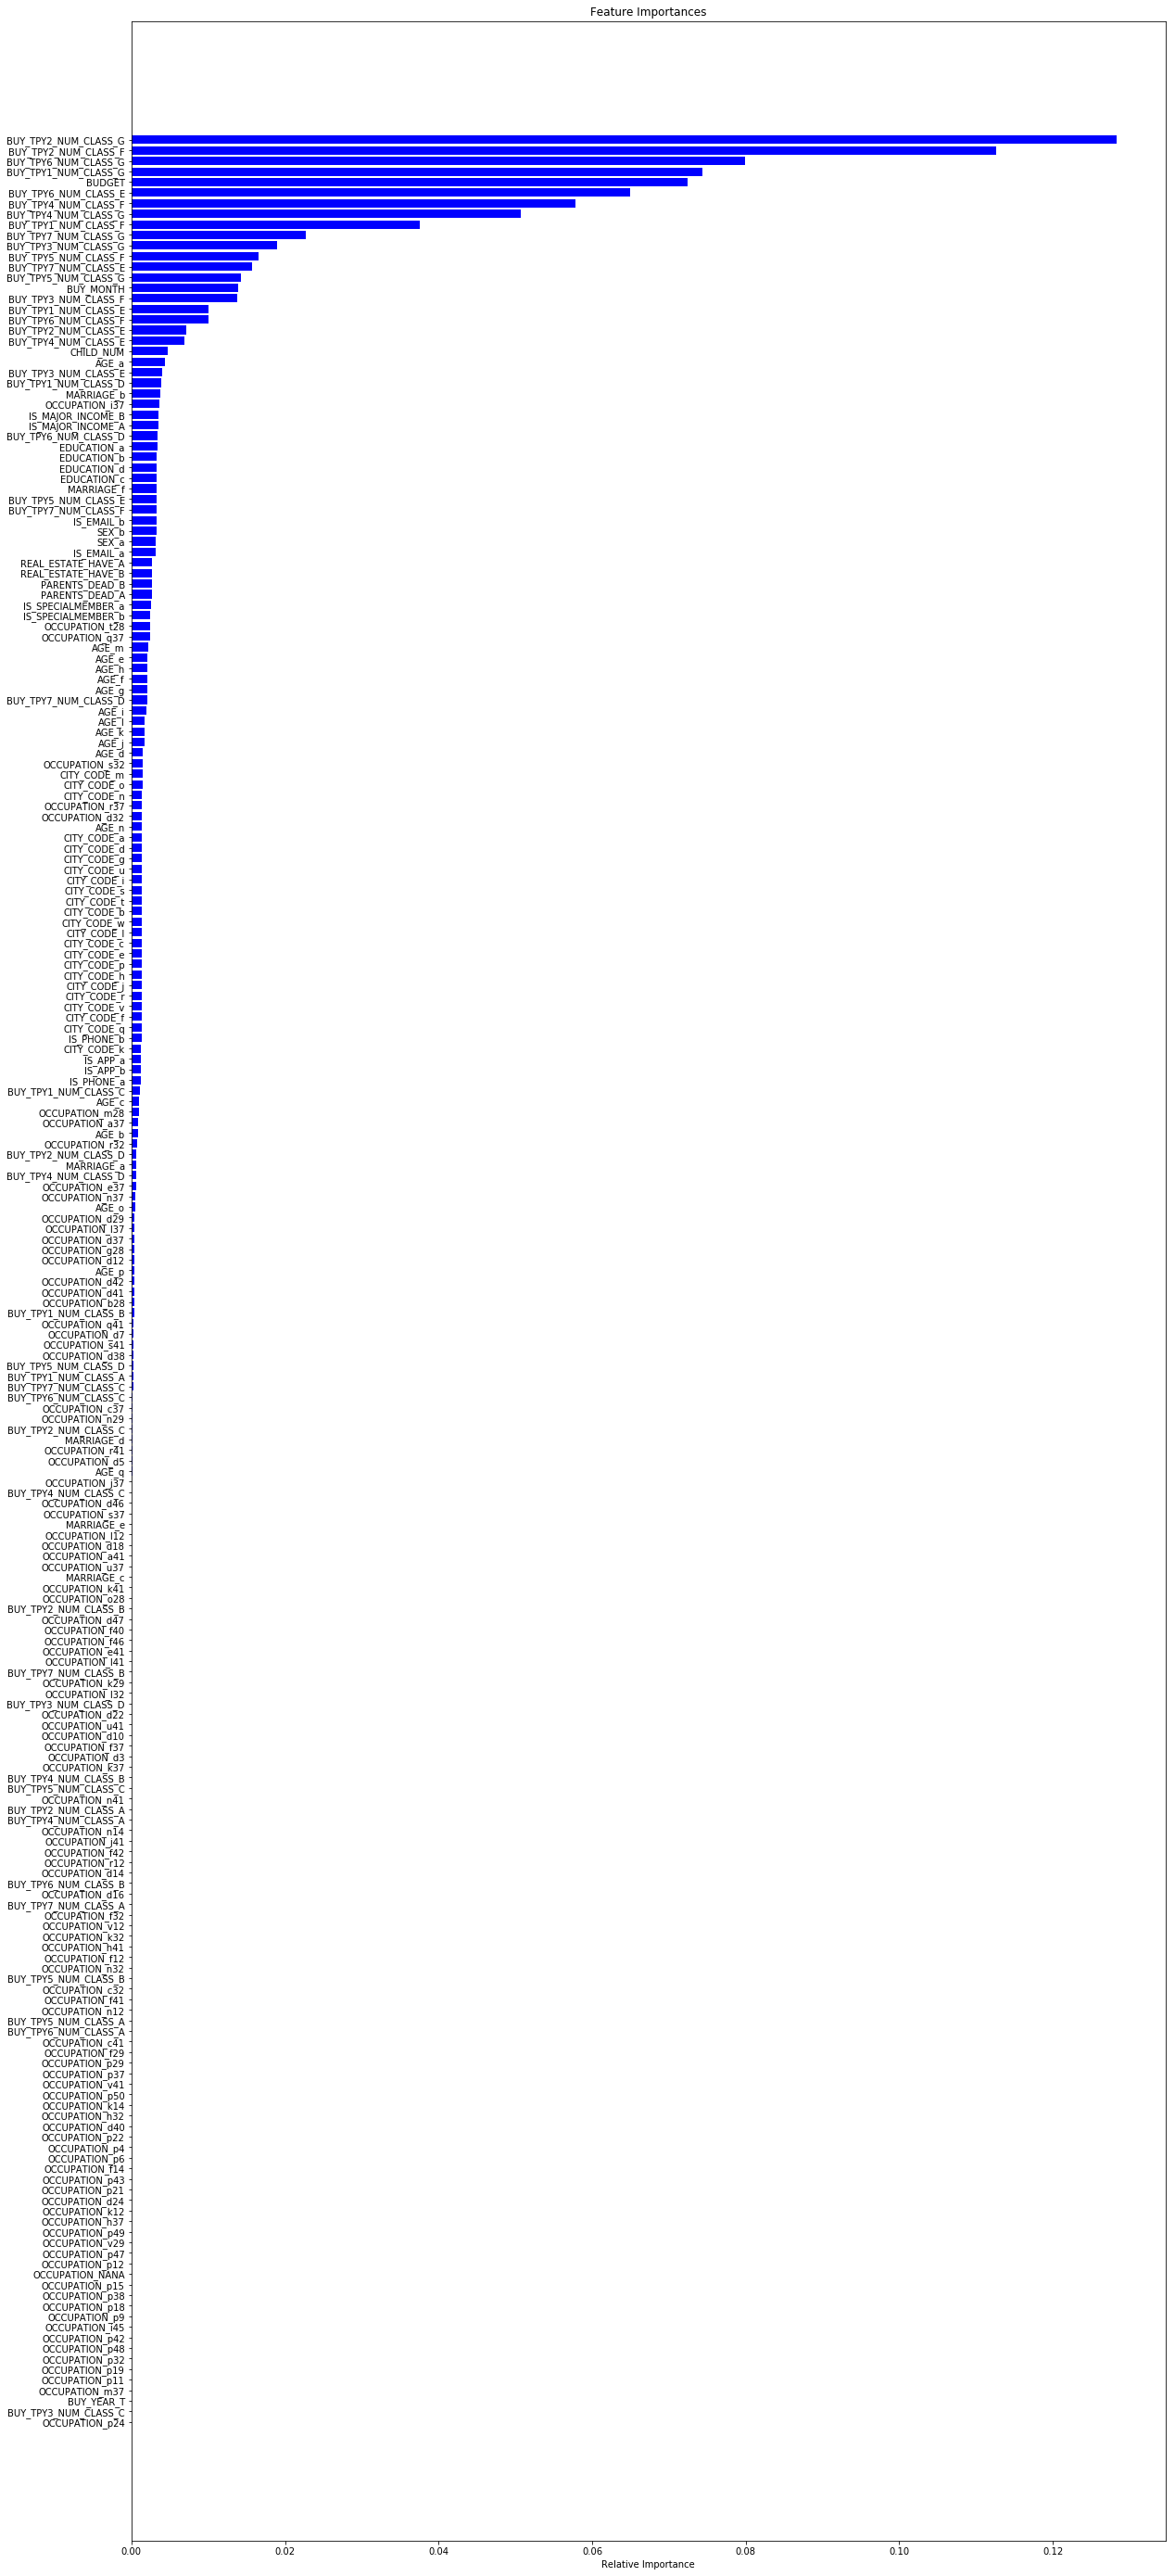

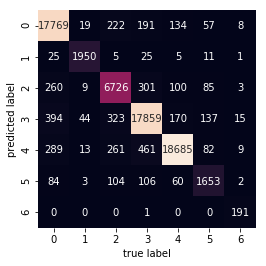

/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:99: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/usr/local/lib/python3.6/site-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


0.945070586185


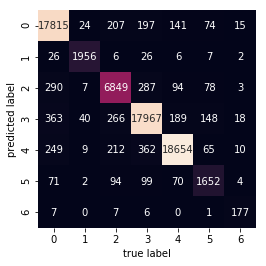

0.929762388892


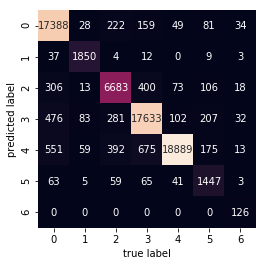

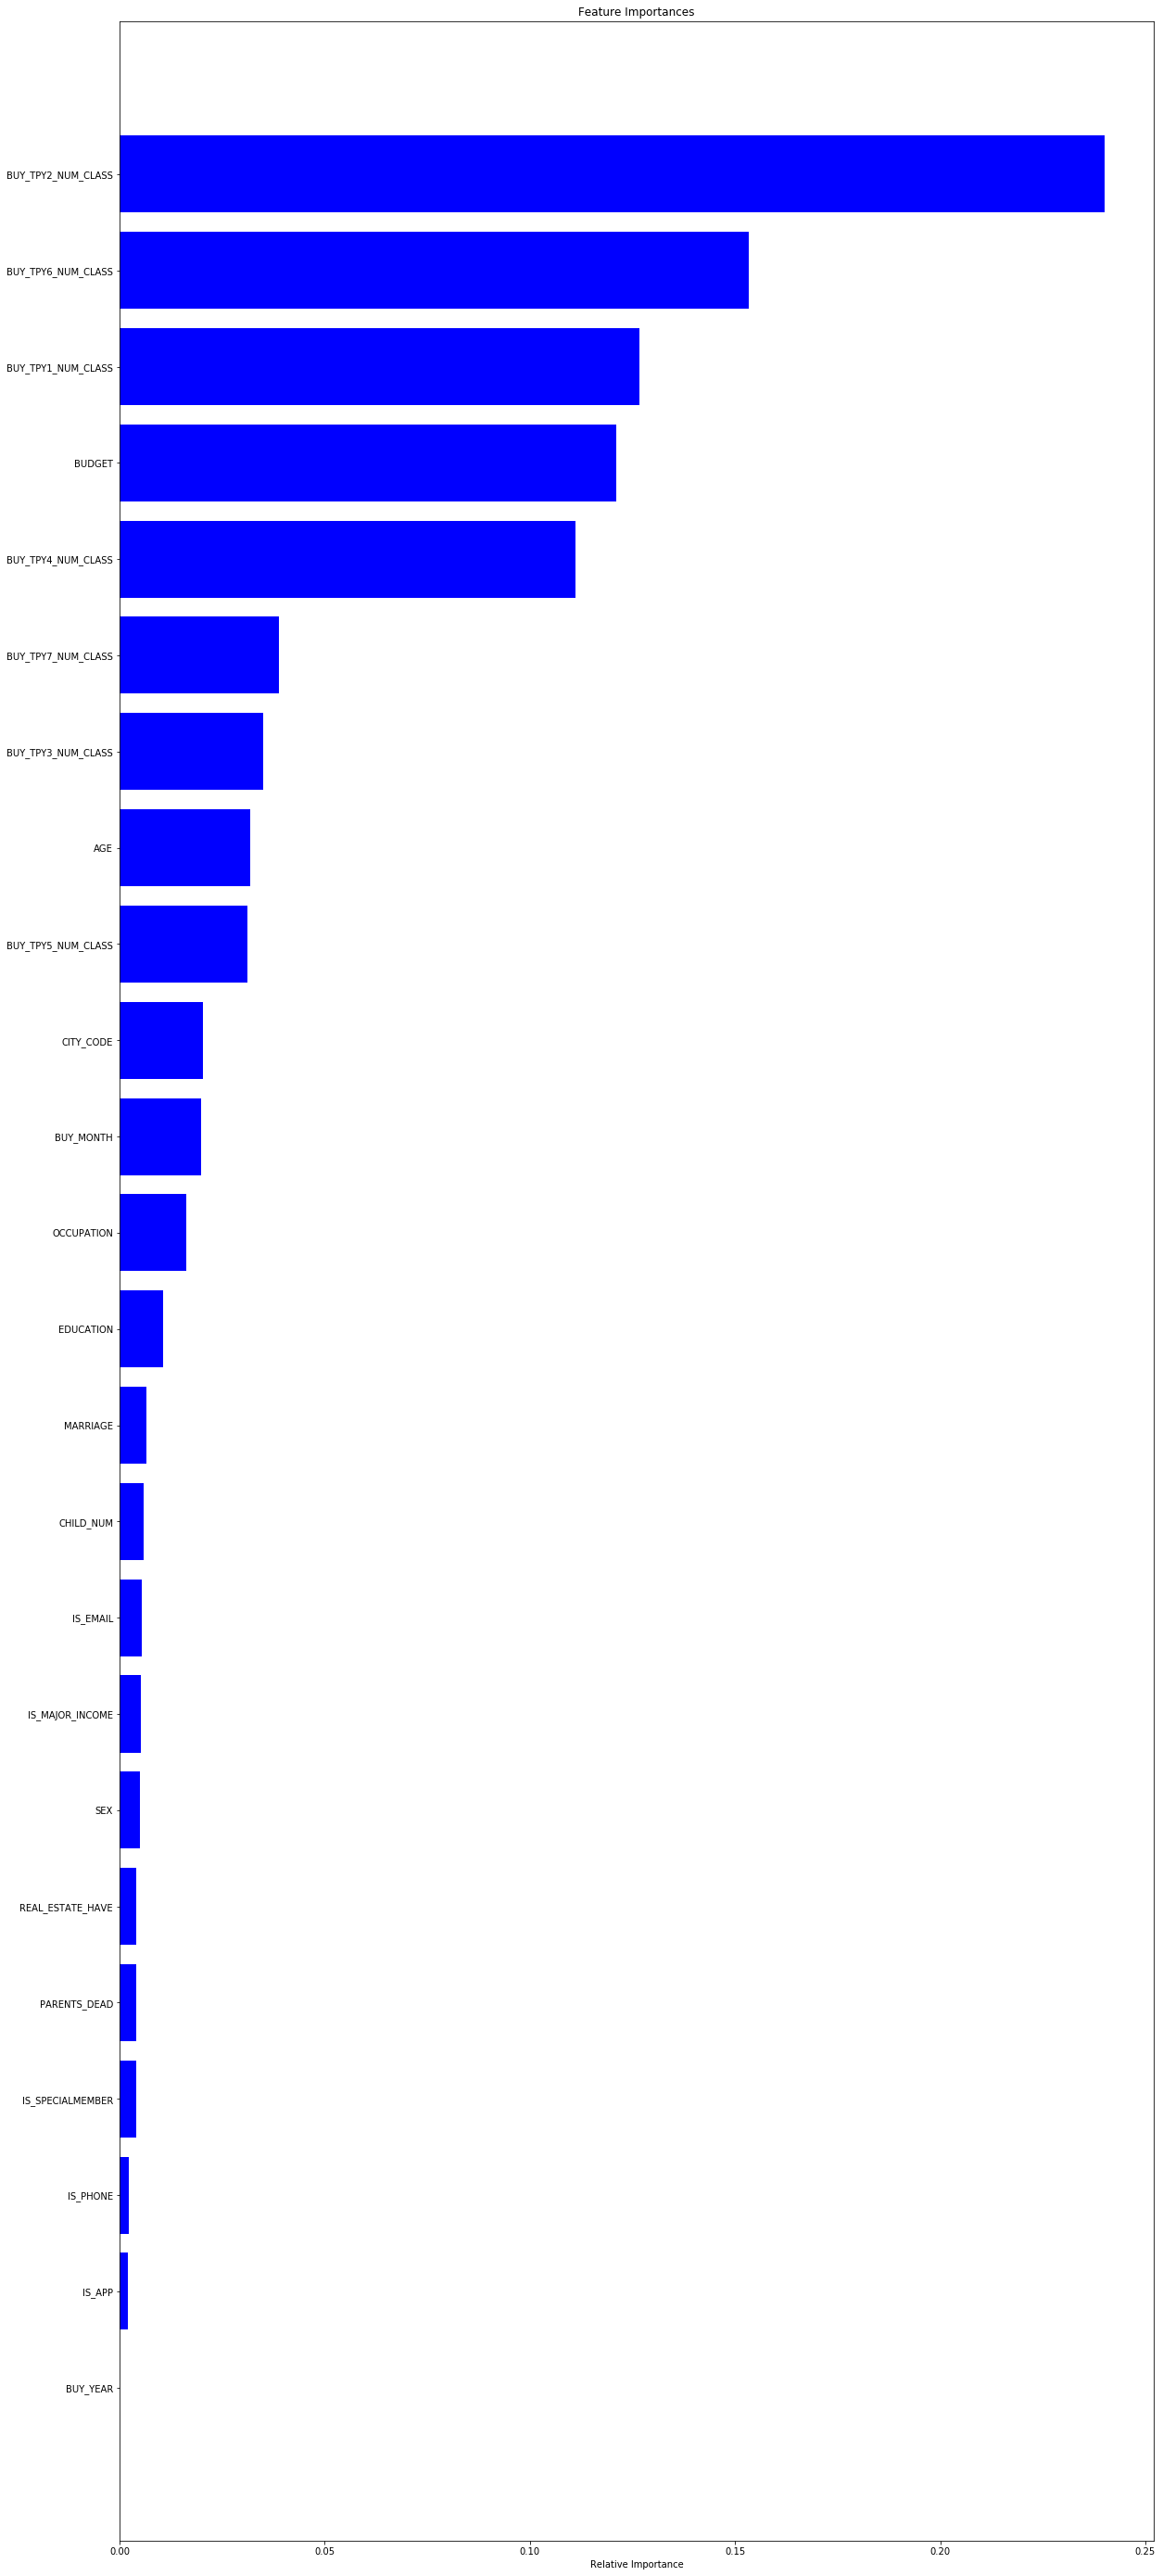

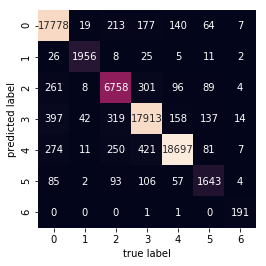

/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:99: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/usr/local/lib/python3.6/site-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


0.945593446813


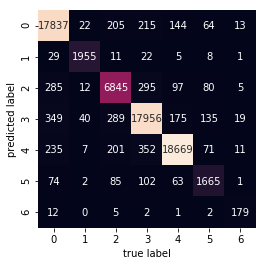

['./lg2.pkl']

In [1]:
# 匯入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

#========================================================================================#
'''第一種方法用one hot encoder對類別型資料做編碼'''
'''整理訓練資料'''
# 匯入資料
train_buy_info = pd.read_csv("train_buy_info.csv")
train_cust_info = pd.read_csv("train_cust_info.csv")
train_tpy_info = pd.read_csv("train_tpy_info.csv")
# 合併三個資料集
train_data = train_buy_info.merge(train_cust_info, on = "CUST_ID").merge(train_tpy_info, on = "CUST_ID")
train_data.set_index('CUST_ID', inplace=True)
# 查看各個欄位的空值
train_data.isnull().sum()
# 將空值過多的欄位直接刪除
null_cols = ['HEIGHT', 'WEIGHT', 
             'BEHAVIOR_1', 'BEHAVIOR_2', 'BEHAVIOR_3',   
             'STATUS1', 'STATUS2', 'STATUS3', 'STATUS4', 
             'IS_NEWSLETTER', 'CHARGE_WAY', 
             'INTEREST1', 'INTEREST2', 'INTEREST3', 'INTEREST4', 'INTEREST5', 
             'INTEREST6', 'INTEREST7', 'INTEREST8', 'INTEREST9', 'INTEREST10']

def drop_null_columns(data):
    data.drop(null_cols, axis=1, inplace=True)
    return None
drop_null_columns(train_data)
# 將只有少數空值的欄位以該欄位出現過最多次數的種類填補
#train_data["IS_EMAIL"].value_counts()
train_data['IS_EMAIL'].fillna(value=train_data['IS_EMAIL'].value_counts().index[0],inplace =True)
#train_data["IS_PHONE"].value_counts()
train_data['IS_PHONE'].fillna(value=train_data['IS_PHONE'].value_counts().index[0],inplace =True)
#train_data["IS_APP"].value_counts()
train_data['IS_APP'].fillna(value=train_data['IS_APP'].value_counts().index[0],inplace =True)
#train_data["IS_SPECIALMEMBER"].value_counts()
train_data['IS_SPECIALMEMBER'].fillna(value=train_data['IS_SPECIALMEMBER'].value_counts().index[0],inplace =True)
#將類別型資料做編碼(One Hot)
cate_cols = ['AGE', 'SEX', 'OCCUPATION', 'BUY_YEAR', 'CITY_CODE', 
            'MARRIAGE', 'EDUCATION', 'IS_EMAIL', 'IS_PHONE', 
            'IS_APP', 'IS_SPECIALMEMBER', 'PARENTS_DEAD', 'REAL_ESTATE_HAVE', 'IS_MAJOR_INCOME', 
            'BUY_TPY1_NUM_CLASS', 'BUY_TPY2_NUM_CLASS', 'BUY_TPY3_NUM_CLASS', 'BUY_TPY4_NUM_CLASS', 
            'BUY_TPY5_NUM_CLASS', 'BUY_TPY6_NUM_CLASS', 'BUY_TPY7_NUM_CLASS']

def one_hot_encoder(data):
    categorical_variables = cate_cols
    data_one_hot_encoded = pd.get_dummies(data, columns=categorical_variables)
    print("====================[Data Types]====================")
    print(data_one_hot_encoded.dtypes)
    return data_one_hot_encoded
oht_data = one_hot_encoder(train_data)
# 切分資料 ->訓練70%、測試30%
train_X = oht_data.iloc[:, 1:]
train_Y = oht_data.iloc[:, 0]
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.3, random_state=42)
'''整理測試資料'''
# 匯入資料
test_buy_info = pd.read_csv("test_buy_x_info.csv")
test_cust_info = pd.read_csv("test_cust_x_info.csv")
test_tpy_info = pd.read_csv("test_tpy_x_info.csv")
# 合併三個資料集
test_data = test_buy_info.merge(test_cust_info, on = "CUST_ID").merge(test_tpy_info, on = "CUST_ID")
test_data.set_index('CUST_ID', inplace=True)
null_cols = ['HEIGHT', 'WEIGHT', 
             'BEHAVIOR_1', 'BEHAVIOR_2', 'BEHAVIOR_3',   
             'STATUS1', 'STATUS2', 'STATUS3', 'STATUS4', 
             'IS_NEWSLETTER', 'CHARGE_WAY', 
             'INTEREST1', 'INTEREST2', 'INTEREST3', 'INTEREST4', 'INTEREST5', 
             'INTEREST6', 'INTEREST7', 'INTEREST8', 'INTEREST9', 'INTEREST10']
# 將空值過多的欄位直接刪除
def drop_null_columns(data):
    data.drop(null_cols, axis=1, inplace=True)
    return None
drop_null_columns(test_data)
test_data['IS_EMAIL'].fillna(value=test_data['IS_EMAIL'].value_counts().index[0],inplace =True)
test_data['IS_PHONE'].fillna(value=test_data['IS_PHONE'].value_counts().index[0],inplace =True)
test_data['IS_APP'].fillna(value=test_data['IS_APP'].value_counts().index[0],inplace =True)
test_data['IS_SPECIALMEMBER'].fillna(value=test_data['IS_SPECIALMEMBER'].value_counts().index[0],inplace =True)
cate_cols = ['AGE', 'SEX', 'OCCUPATION', 'BUY_YEAR', 'CITY_CODE', 
            'MARRIAGE', 'EDUCATION', 'IS_EMAIL', 'IS_PHONE', 
            'IS_APP', 'IS_SPECIALMEMBER', 'PARENTS_DEAD', 'REAL_ESTATE_HAVE', 'IS_MAJOR_INCOME', 
            'BUY_TPY1_NUM_CLASS', 'BUY_TPY2_NUM_CLASS', 'BUY_TPY3_NUM_CLASS', 'BUY_TPY4_NUM_CLASS', 
            'BUY_TPY5_NUM_CLASS', 'BUY_TPY6_NUM_CLASS', 'BUY_TPY7_NUM_CLASS']
#將類別型資料做編碼(One Hot)
def one_hot_encoder(data):
    categorical_variables = cate_cols
    data_one_hot_encoded = pd.get_dummies(data, columns=categorical_variables)
    print("====================[Data Types]====================")
    print(data_one_hot_encoded.dtypes)
    return data_one_hot_encoded
test_enc_data = one_hot_encoder(test_data)
# 找出測試集中缺少訓練集的欄位 並且填補於測試集中
missing_cols = set( oht_data.columns ) - set( test_enc_data.columns )
for c in missing_cols:
    test_enc_data[c] = 0
test_enc_data = test_enc_data[oht_data.columns]
del test_enc_data['BUY_TYPE']
test = test_enc_data


'''建模'''
# 模型ㄧ:Random Forest
rf_clf = RandomForestClassifier(n_estimators = 550,
                                max_depth = None, 
                                criterion = 'gini', 
                                max_features = 'auto')
rf_clf.fit(x_train, y_train)
# 預測
y_pred = rf_clf.predict(x_test)
# 計算準確度
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
# 準確度
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
# 看欄位重要度
importances = rf_clf.feature_importances_
indices = np.argsort(importances)
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(20, 50))
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), x_train.columns[indices])
plt.xlabel('Relative Importance')
plt.show()
# 將模型拿來預測最後測試集
prediction1 = rf_clf.predict(test)
# 匯出資料
output1 = pd.read_csv("Submmit_Sample_testing_Set.csv")
output1['BUY_TYPE'] = prediction1
output1.to_csv("result.csv")
# 保存模型
joblib.dump(rf_clf, './rf_clf.pkl')




# 模型二:XGBoost
xgbc = XGBClassifier(max_depth=10, 
                      objective='multi', 
                      min_child_weight = 1)
xgbc.fit(x_train, y_train)
# 計算準確度
xgbc.score(x_test, y_test)
# 預測
predictions = xgbc.predict(x_test)
# 準確度
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
# 將模型拿來預測最後測試集
prediction2 = xgbc.predict(test)
# 匯出資料
output2 = pd.read_csv("Submmit_Sample_testing_Set.csv")
output2['BUY_TYPE'] = prediction2
output2.to_csv("result2.csv")
# 保存模型
joblib.dump(xgbc, './xgbc.pkl')




# 模型三:LightGBM
import lightgbm as lgb
lg = lgb.LGBMClassifier(objective='multiclass', 
                         num_class=7,  
                         num_iterations=550, 
                         learning_rate = 0.2,
                         task = 'train', 
                         boosting = 'rf', 
                         feature_fraction = 0.9, 
                         bagging_fraction = 0.9, 
                         verbosity = -1)
lg.fit(x_train, y_train)
# 預測
y_pred = lg.predict(x_test)
# 計算準確度
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
# 準確度
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
# 將模型拿來預測最後測試集
prediction3 = lg.predict(test)
# 匯出資料
output3 = pd.read_csv("Submmit_Sample_testing_Set.csv")
output3['BUY_TYPE'] = prediction3
output3.to_csv("result3.csv")
# 保存模型
joblib.dump(lg, './lg.pkl')



#========================================================================================#
'''第二種方法用Label encoder對類別型資料做編碼'''
'''整理訓練/測試資料'''
# 匯入資料
train_buy_info = pd.read_csv("train_buy_info.csv")
train_cust_info = pd.read_csv("train_cust_info.csv")
train_tpy_info = pd.read_csv("train_tpy_info.csv")
test_buy_info = pd.read_csv("test_buy_x_info.csv")
test_cust_info = pd.read_csv("test_cust_x_info.csv")
test_tpy_info = pd.read_csv("test_tpy_x_info.csv")
# 個別合併三個資料集
train_data = train_buy_info.merge(train_cust_info, on = "CUST_ID").merge(train_tpy_info, on = "CUST_ID")
train_data.set_index('CUST_ID', inplace=True)
test_data = test_buy_info.merge(test_cust_info, on = "CUST_ID").merge(test_tpy_info, on = "CUST_ID")
test_data.set_index('CUST_ID', inplace=True)
# train & test 合併一起處理(LabelEncoder)
data = train_data.append(test_data)
# 察看欄位空值
data.isnull().sum()
# 去除空值過多的欄位
null_cols = ['HEIGHT', 'WEIGHT', 
             'BEHAVIOR_1', 'BEHAVIOR_2', 'BEHAVIOR_3',   
             'STATUS1', 'STATUS2', 'STATUS3', 'STATUS4', 
             'IS_NEWSLETTER', 'CHARGE_WAY', 
             'INTEREST1', 'INTEREST2', 'INTEREST3', 'INTEREST4', 'INTEREST5', 
             'INTEREST6', 'INTEREST7', 'INTEREST8', 'INTEREST9', 'INTEREST10']
def drop_null_columns(data):
    data.drop(null_cols, axis=1, inplace=True)
    return None
drop_null_columns(data)
# 以各欄位出現次數最多的種類填補
#train_data["IS_EMAIL"].value_counts()
data['IS_EMAIL'].fillna(value=data['IS_EMAIL'].value_counts().index[0],inplace =True)
#train_data["IS_PHONE"].value_counts()
data['IS_PHONE'].fillna(value=data['IS_PHONE'].value_counts().index[0],inplace =True)
#train_data["IS_APP"].value_counts()
data['IS_APP'].fillna(value=data['IS_APP'].value_counts().index[0],inplace =True)
#train_data["IS_SPECIALMEMBER"].value_counts()
data['IS_SPECIALMEMBER'].fillna(value=data['IS_SPECIALMEMBER'].value_counts().index[0],inplace =True)
dd = data.drop(['BUY_TYPE'], axis=1)
# 用LabelEncoder編碼
le = LabelEncoder()
cate_cols = ['AGE', 'SEX', 'OCCUPATION', 'BUY_YEAR', 'CITY_CODE', 
            'MARRIAGE', 'EDUCATION', 'IS_EMAIL', 'IS_PHONE', 
            'IS_APP', 'IS_SPECIALMEMBER', 'PARENTS_DEAD', 'REAL_ESTATE_HAVE', 'IS_MAJOR_INCOME', 
            'BUY_TPY1_NUM_CLASS', 'BUY_TPY2_NUM_CLASS', 'BUY_TPY3_NUM_CLASS', 'BUY_TPY4_NUM_CLASS', 
            'BUY_TPY5_NUM_CLASS', 'BUY_TPY6_NUM_CLASS', 'BUY_TPY7_NUM_CLASS']
def label_encoder(data):
    le = LabelEncoder()
    label_encoded = data.apply(le.fit_transform)
    #print("====================[Data Types]====================")
    #print(label_encoded.dtypes)
    return label_encoded
le_data = label_encoder(dd)
y = le.fit_transform(data['BUY_TYPE'][:229504])
# 將原本的train & test再分開一次
train_data = le_data.iloc[:229504, :]
test_data = le_data.iloc[229504:, :]
# 切分train資料集 -> train70%, test30%
train_X = le_data.iloc[:, 1:]
train_Y = le_data.iloc[:, 0]
x_train, x_test, y_train, y_test = train_test_split(train_data, y, test_size=0.3, random_state=42)



'''建模'''
# 模型ㄧ:Random Forest
rf_clf = RandomForestClassifier(n_estimators = 550,
                                max_depth = None, 
                                criterion = 'gini', 
                                max_features = 'auto')
rf_clf.fit(x_train, y_train)
# 預測
y_pred = rf_clf.predict(x_test)
# 計算準確度
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
# 準確度
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
# 看欄位重要度
importances = rf_clf.feature_importances_
indices = np.argsort(importances)
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(20, 50))
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), x_train.columns[indices])
plt.xlabel('Relative Importance')
plt.show()
# 將模型拿來預測最後測試集
prediction4 = rf_clf.predict(test_data)
# 匯出資料
output4 = pd.read_csv("Submmit_Sample_testing_Set.csv")
output4['BUY_TYPE'] = prediction4
output4.to_csv("result4.csv")
# 保存模型
joblib.dump(rf_clf, './rf_clf2.pkl')




# 模型二:XGBoost
xgbc = XGBClassifier(max_depth=10, 
                      objective='multi', 
                      min_child_weight = 1)
xgbc.fit(x_train, y_train)
# 計算準確度
xgbc.score(x_test, y_test)
# 預測
predictions = xgbc.predict(x_test)
# 準確度
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
# 將模型拿來預測最後測試集
prediction5 = xgbc.predict(test_data)
# 匯出資料
output5 = pd.read_csv("Submmit_Sample_testing_Set.csv")
output5['BUY_TYPE'] = prediction5
output5.to_csv("result5.csv")
# 保存模型
joblib.dump(xgbc, './xgbc2.pkl')




# 模型三:LightGBM
import lightgbm as lgb
lg = lgb.LGBMClassifier(objective='multiclass', 
                         num_class=7,  
                         num_iterations=550, 
                         learning_rate = 0.2,
                         task = 'train', 
                         boosting = 'rf', 
                         feature_fraction = 0.9, # 指定每次疊代所需要的特徵部分
                         bagging_fraction = 0.9, # 指定每次疊代所需要的數據部分，並且它通常是被用來提升訓練速度和避免過擬合
                         verbosity = -1)
lg.fit(x_train, y_train)
# 預測
y_pred = lg.predict(x_test)
# 計算準確度
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
# 準確度
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
# 將模型拿來預測最後測試集
prediction6 = lg.predict(test_data)
result = le.inverse_transform(prediction6)
# 匯出資料
output6 = pd.read_csv("Submmit_Sample_testing_Set.csv")
output6['BUY_TYPE'] = result
output6.to_csv("result6.csv")
# 保存模型
joblib.dump(lg, './lg2.pkl')

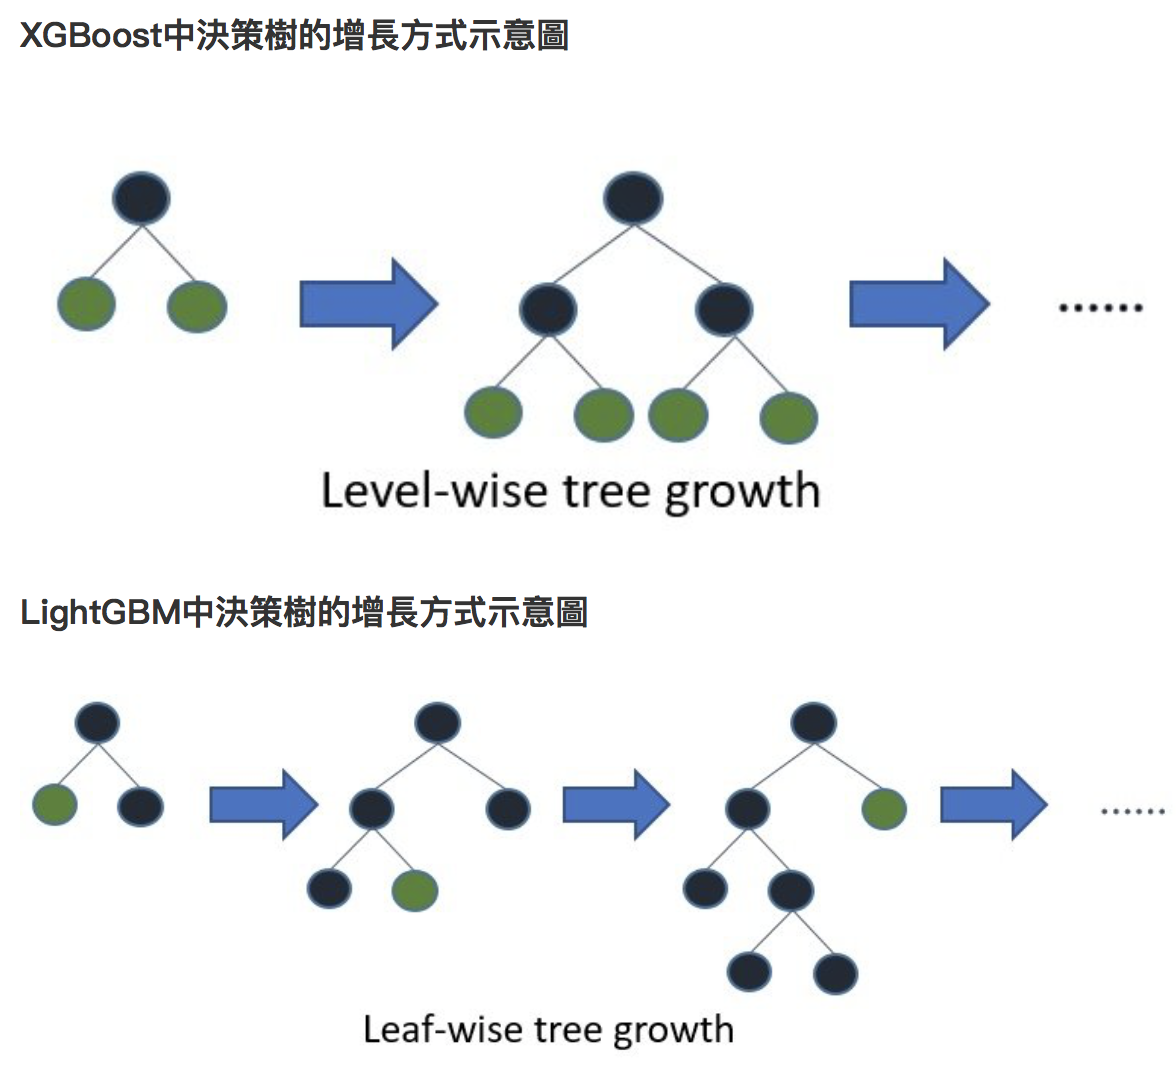

LightGBM使用基於直方圖的算法。例如，它將連續的特徵值分桶(buckets)裝進離散的箱子(bins)，這使得訓練過程中變得更快。